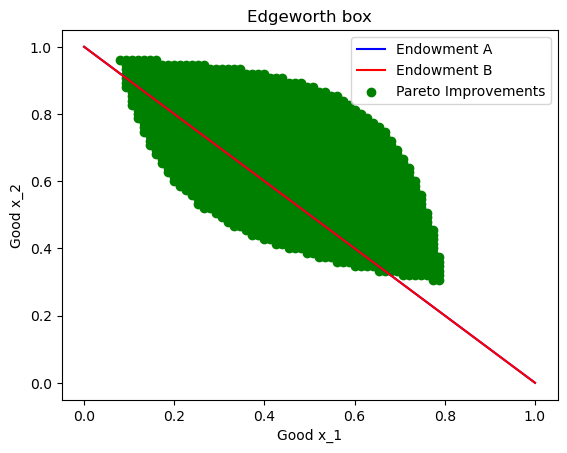

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#Define parameters
alpha=1/3
beta=2/3
p2=1
N=75

#Initial endowment
w_A_1=0.8
w_A_2=0.3
w_B_1=1-w_A_1
w_B_2=1-w_A_2
w_1=w_A_1+w_B_1
w_2=w_A_2+w_B_2

#Seed
seed=1986
np.random.seed()



#Define utility and demand function
def u_A(x1, x2):
    return x1**alpha*x2**(1-alpha)

def u_B(x1, x2):
    return x1**beta*x2**(1-beta)

def A_demand_1(p1,p2,w_A_1,w_A_2):
    return alpha*(p1*w_A_1+p2*w_A_2)/p1


def A_demand_2(p1,p2,w_A_1,w_A_2):
    return (1-alpha)*(p1*w_A_1+p2*w_A_2)/p2


def B_demand_1(p1,p2,w_A_1,w_A_2):
    return alpha*(p1*w_A_1+p2*w_A_2)/p1

def B_demand_2(p1,p2,w_A_1,w_A_2):
    return (1-beta)*(p1*w_A_1+p2*w_A_2)/p2

#Create a grid of points in E-boks
A_demand_1_values = np.linspace(0, 1, N+1)
A_demand_2_values = np.linspace(0, 1, N+1)


#Check pareto improvement condition
pareto_improvement_set = []
for A_demand_1_loop in A_demand_1_values:
    for A_demand_2_loop in A_demand_2_values:
        A_demand = (A_demand_1_loop, A_demand_2_loop)
        B_demand = (1 - A_demand_1_loop, 1 - A_demand_2_loop)

        if u_A(*A_demand) >= u_A(w_A_1, w_A_2) and u_B(*B_demand) >= u_B(w_B_1, w_B_2):
            pareto_improvement_set.append(A_demand)


#Plotting edgeworth box
# Plotting edgeworth box
fig, ax = plt.subplots()  # Corrected subplots creation

ax.plot(A_demand_1_values, 1 - A_demand_1_values, label="Endowment A", color="blue")  # Corrected color specification
ax.plot(A_demand_2_values, 1 - A_demand_2_values, label="Endowment B", color="red")  # Corrected color specification

x_A1_pareto, x_A2_pareto = zip(*pareto_improvement_set)
ax.scatter(x_A1_pareto, x_A2_pareto, color="green", label="Pareto Improvements")  # Corrected color specification

ax.set_xlabel("Good x_1")
ax.set_ylabel("Good x_2")
ax.set_title("Edgeworth box")  # Corrected title setting
ax.legend()  # Corrected legend method

plt.show()
